# Testing `use_clr_beta`

Aiming to replicate [these results](http://forums.fast.ai/t/project-cyclical-momentum/14435/17?u=borz).

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.conv_learner import *
from pathlib import Path

import utils_misc

In [2]:
PATH = Path('data/cifar10')
PATH_CPU = PATH/'cpu'

In [3]:
utils_misc.create_cpu_dataset(PATH, p=0.1)
utils_misc.count_files(PATH_CPU/'train')

5000

In [4]:
cifar_stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

sz = 32
bs = 64

In [5]:
tfms = tfms_from_stats(cifar_stats, sz, aug_tfms=transforms_side_on, pad=sz//8)
mdata = ImageClassifierData.from_paths(PATH, trn_name='cpu/train', val_name='test', tfms=tfms, bs=bs)

## 1. Testing a Network

In [6]:
f_model = resnet18

In [7]:
learner = ConvLearner.pretrained(f_model, mdata)

 92%|█████████▏| 73/79 [00:33<00:02,  2.19it/s, loss=10]  

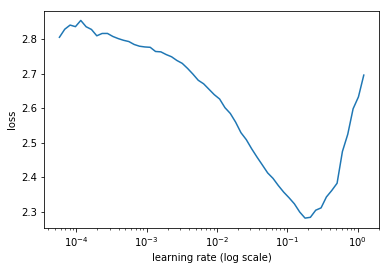

In [10]:
learner.lr_find()
learner.sched.plot()

In [12]:
learner.fit(0.01, n_cycle=1, cycle_len=10, use_clr_beta=(10,10,0.95,0.85))

 24%|██▍       | 19/79 [00:09<00:30,  1.99it/s, loss=2.64]
epoch      trn_loss   val_loss   accuracy                 
    0      1.951884   1.352493   0.527     
    1      1.602065   1.235719   0.5683                   
    2      1.474465   1.191878   0.5811                   
    3      1.405826   1.175171   0.5842                   
    4      1.350496   1.144174   0.5967                   
    5      1.333715   1.130437   0.5994                   
    6      1.323466   1.122469   0.6                      
    7      1.280343   1.126339   0.5968                   
    8      1.248124   1.102004   0.6087                   
    9      1.224966   1.104004   0.6023                   



[array([1.104]), 0.6023]

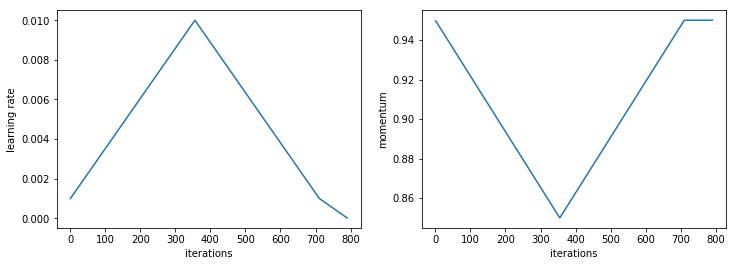

In [14]:
learner.sched.plot_lr()

In [49]:
learner.fit(0.2, n_cycle=1, cycle_len=10, use_clr_beta=(10,10,0.95,0.85))

 15%|█▌        | 12/79 [00:07<00:41,  1.63it/s, loss=1.19]
epoch      trn_loss   val_loss   accuracy                 
    0      1.686832   1.700286   0.4821    
    1      1.65952    1.211724   0.5739                   
    2      1.473064   1.218859   0.5674                   
    3      1.407511   1.236371   0.5571                   
    4      1.40886    1.287926   0.559                    
    5      1.381277   1.145386   0.5957                   
    6      1.321168   1.142164   0.5919                   
    7      1.299261   1.119227   0.6038                   
    8      1.225187   1.078628   0.6183                   
    9      1.153542   1.065773   0.6243                   



[array([1.06577]), 0.6243]